In [1]:
# Import delle librerie necessarie
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm

import numpy as np
import pandas as pd

import os
import matplotlib.pyplot as plt
import pandas_datareader as web
import datetime as dt

import matplotlib.dates as dates
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
# Caricamento del dataset da un file CSV
df=pd.read_csv('Zoom.csv')

In [3]:
# Visualizzazione delle prime righe del dataset
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-04-18,65.000000,66.000000,60.320999,62.000000,62.000000,25764700
1,2019-04-22,61.000000,68.900002,59.939999,65.699997,65.699997,9949700
2,2019-04-23,66.870003,74.168999,65.550003,69.000000,69.000000,6786500
3,2019-04-24,71.400002,71.500000,63.160000,63.200001,63.200001,4973500
4,2019-04-25,64.739998,66.849998,62.599998,65.000000,65.000000,3863300


In [4]:
# Informazioni sulle colonne e i tipi di dati nel dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619 entries, 0 to 618
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       619 non-null    object 
 1   Open       619 non-null    float64
 2   High       619 non-null    float64
 3   Low        619 non-null    float64
 4   Close      619 non-null    float64
 5   Adj Close  619 non-null    float64
 6   Volume     619 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 34.0+ KB


In [5]:
# Impostazione della colonna 'Date' come indice e rimozione della colonna 'Date'
df.index = pd.to_datetime(df["Date"])
df.drop('Date', axis=1, inplace=True)

In [6]:
# Visualizzazione delle prime righe dopo la modifica
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-04-18,65.000000,66.000000,60.320999,62.000000,62.000000,25764700
2019-04-22,61.000000,68.900002,59.939999,65.699997,65.699997,9949700
2019-04-23,66.870003,74.168999,65.550003,69.000000,69.000000,6786500
2019-04-24,71.400002,71.500000,63.160000,63.200001,63.200001,4973500
2019-04-25,64.739998,66.849998,62.599998,65.000000,65.000000,3863300


In [7]:
# Statistiche descrittive del dataset
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,619.000000,619.000000,619.000000,619.000000,619.000000,6.190000e+02
mean,235.505811,241.224444,229.455773,235.457084,235.457084,6.184733e+06
std,141.699867,144.768046,137.965832,141.225868,141.225868,6.077695e+06
min,61.000000,63.740002,59.939999,62.000000,62.000000,5.126000e+05
25%,91.100003,92.310001,88.059998,90.439999,90.439999,2.312950e+06
50%,251.259995,256.829987,247.210007,252.330002,252.330002,3.934400e+06
75%,358.272492,364.755005,348.825500,357.684998,357.684998,8.050200e+06
max,572.500000,588.840027,562.549988,568.340027,568.340027,5.322620e+07


Text(0, 0.5, 'open price')

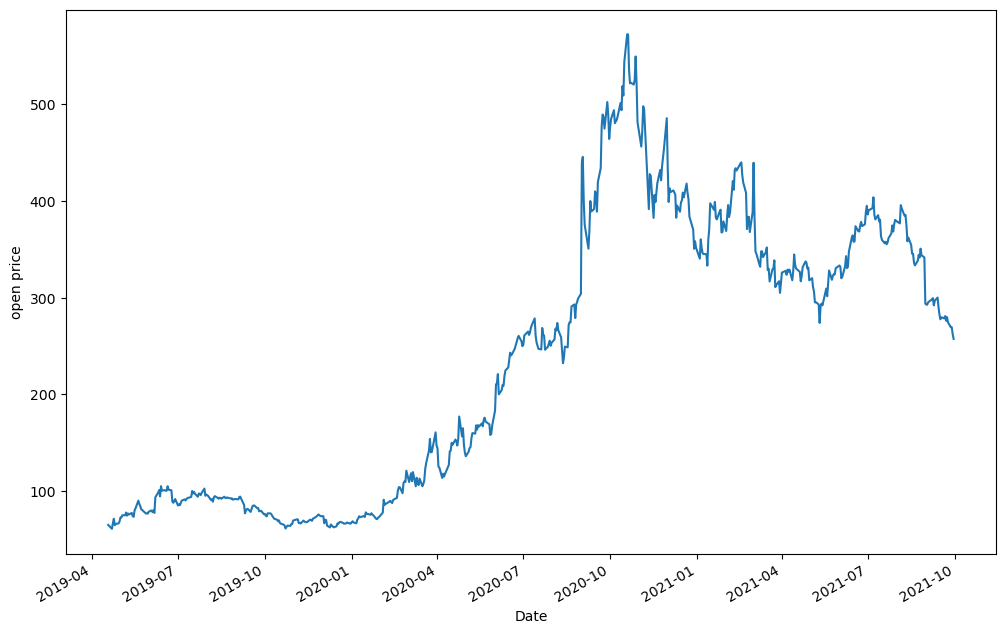

In [8]:
# Plot dei dati della colonna 'Open'
df['Open'].plot(figsize=(12,8))
plt.ylabel("open price")

Text(0, 0.5, 'High price')

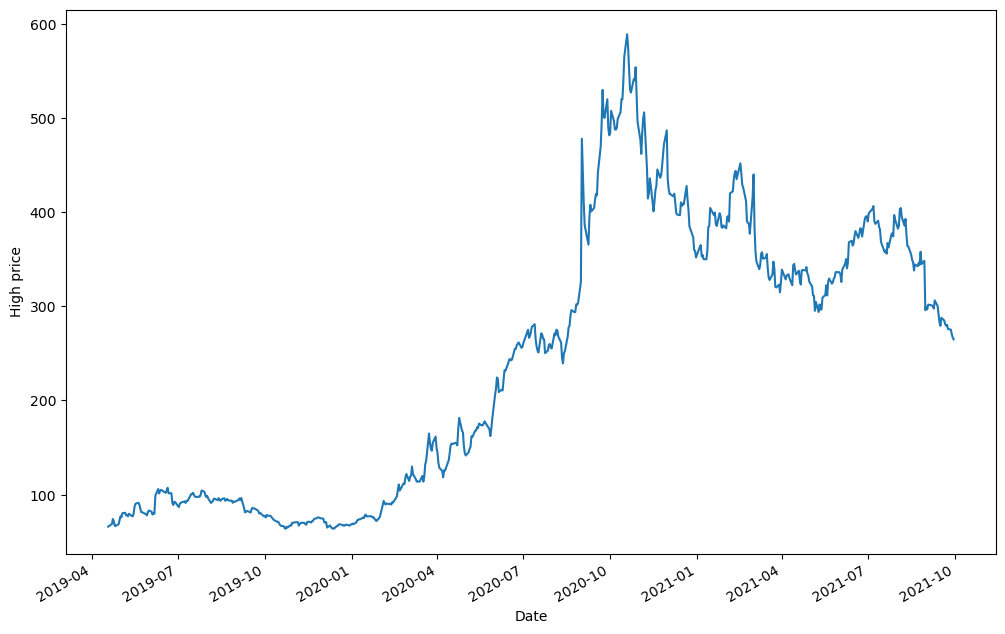

In [9]:
# Plot dei dati della colonna 'High'
df['High'].plot(figsize=(12,8))
plt.ylabel("High price")

Text(0, 0.5, 'Volume price')

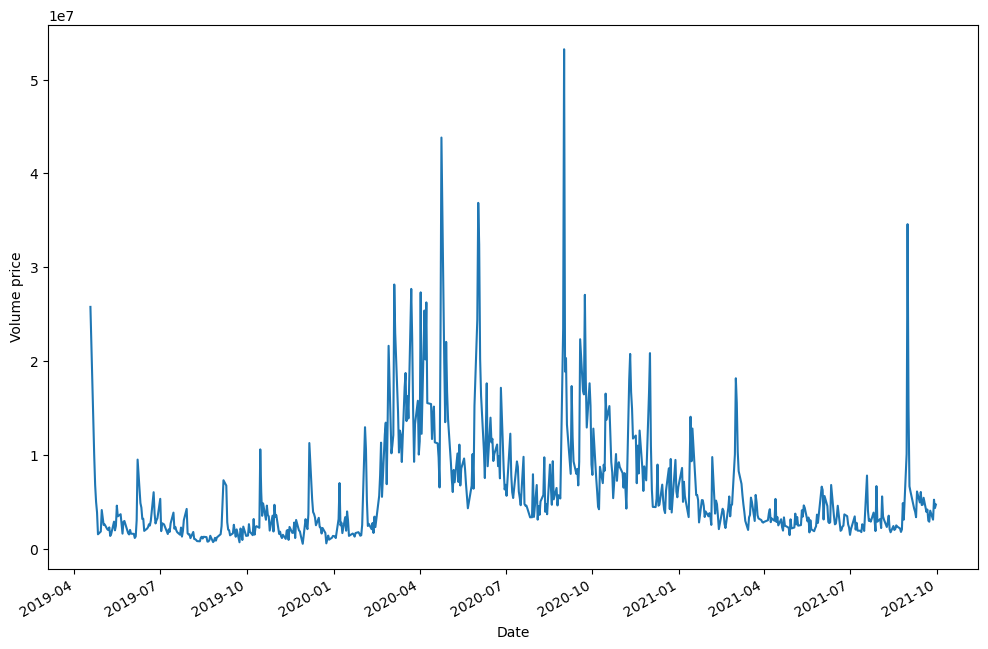

In [10]:
# Plot dei dati della colonna 'Volume'
df['Volume'].plot(figsize=(12,8))
plt.ylabel("Volume price")

In [11]:
# Controlla la presenza di valori nulli
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [12]:
# Creazione di una nuova colonna 'Total Pos' con la somma delle colonne
df['Total Pos'] = df.sum(axis=1)

In [13]:
# Visualizzazione delle prime righe dopo l'aggiunta della colonna
df.head()

,Open,High,Low,Close,Adj Close,Volume,Total Pos
Date,,,,,,,
2019-04-18,65.000000,66.000000,60.320999,62.000000,62.000000,25764700,2.576502e+07
2019-04-22,61.000000,68.900002,59.939999,65.699997,65.699997,9949700,9.950021e+06
2019-04-23,66.870003,74.168999,65.550003,69.000000,69.000000,6786500,6.786845e+06
2019-04-24,71.400002,71.500000,63.160000,63.200001,63.200001,4973500,4.973832e+06
2019-04-25,64.739998,66.849998,62.599998,65.000000,65.000000,3863300,3.863624e+06


Text(0.5, 1.0, 'Total Portfolio Value')

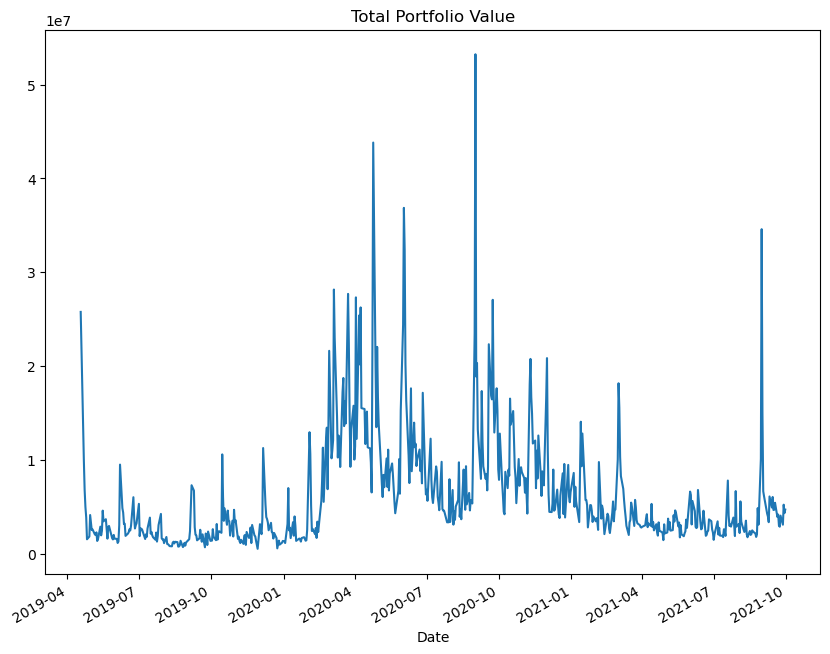

In [14]:
# Plot del valore totale del portafoglio nel tempo
df['Total Pos'].plot(figsize=(10,8))
plt.title('Total Portfolio Value')

<Axes: xlabel='Date'>

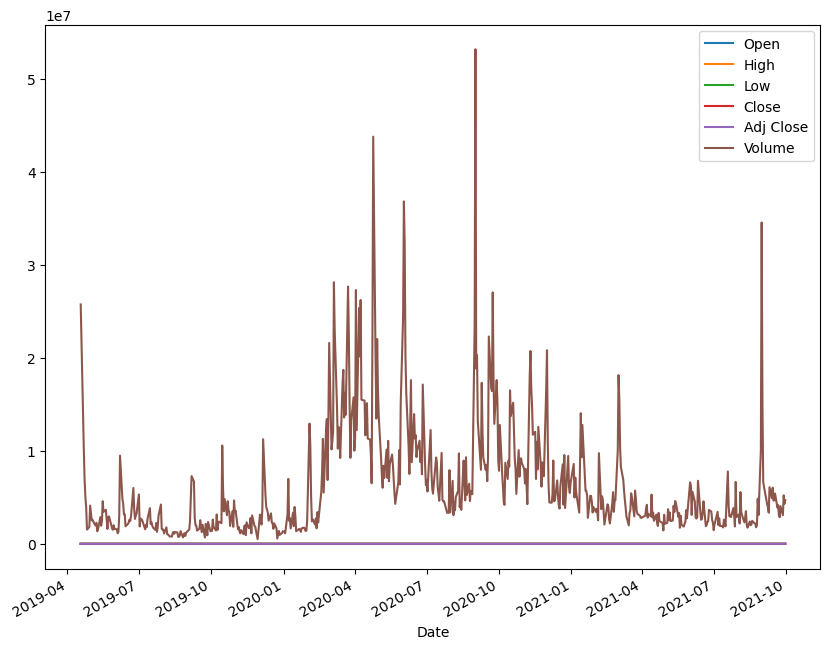

In [15]:
# Rimozione della colonna 'Total Pos' per plottare le colonne originali
df.drop('Total Pos',axis=1).plot(kind='line',figsize=(10,8))

In [16]:
# Calcolo del rendimento giornaliero
df['Daily Return'] = df['Total Pos'].pct_change(1)

In [17]:
# Calcolo del rendimento cumulativo
cum_ret = 100 * (df['Total Pos'][-1]/df['Total Pos'][0] -1 )
print('Our return {} was percent!'.format(cum_ret))

Our return -81.78110722035855 was percent!


In [18]:
# Calcolo della media del rendimento giornaliero
df['Daily Return'].mean()

0.12795076446845902

In [19]:
# Calcolo della deviazione standard del rendimento giornaliero
df['Daily Return'].std()

0.6616568750426985

<Axes: ylabel='Density'>

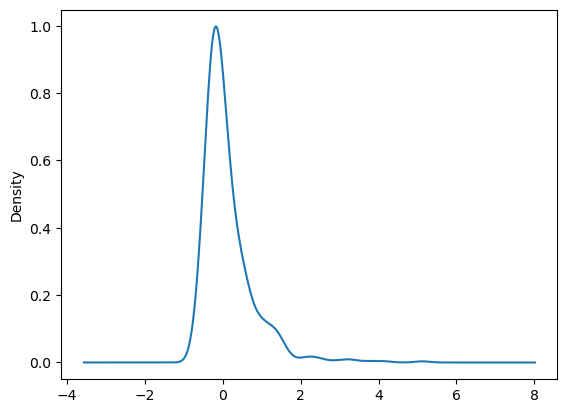

In [20]:
# Plot della distribuzione del rendimento giornaliero
df['Daily Return'].plot(kind='kde')

In [21]:
# Calcolo del rapporto di Sharpe
SR = df['Daily Return'].mean()/df['Daily Return'].std()

In [22]:
SR

0.1933793319387817

In [23]:
# Calcolo del rapporto di Sharpe annuale
ASR = (252**0.5)*SR

In [24]:
ASR

3.0698017260589583

<Axes: xlabel='Date'>

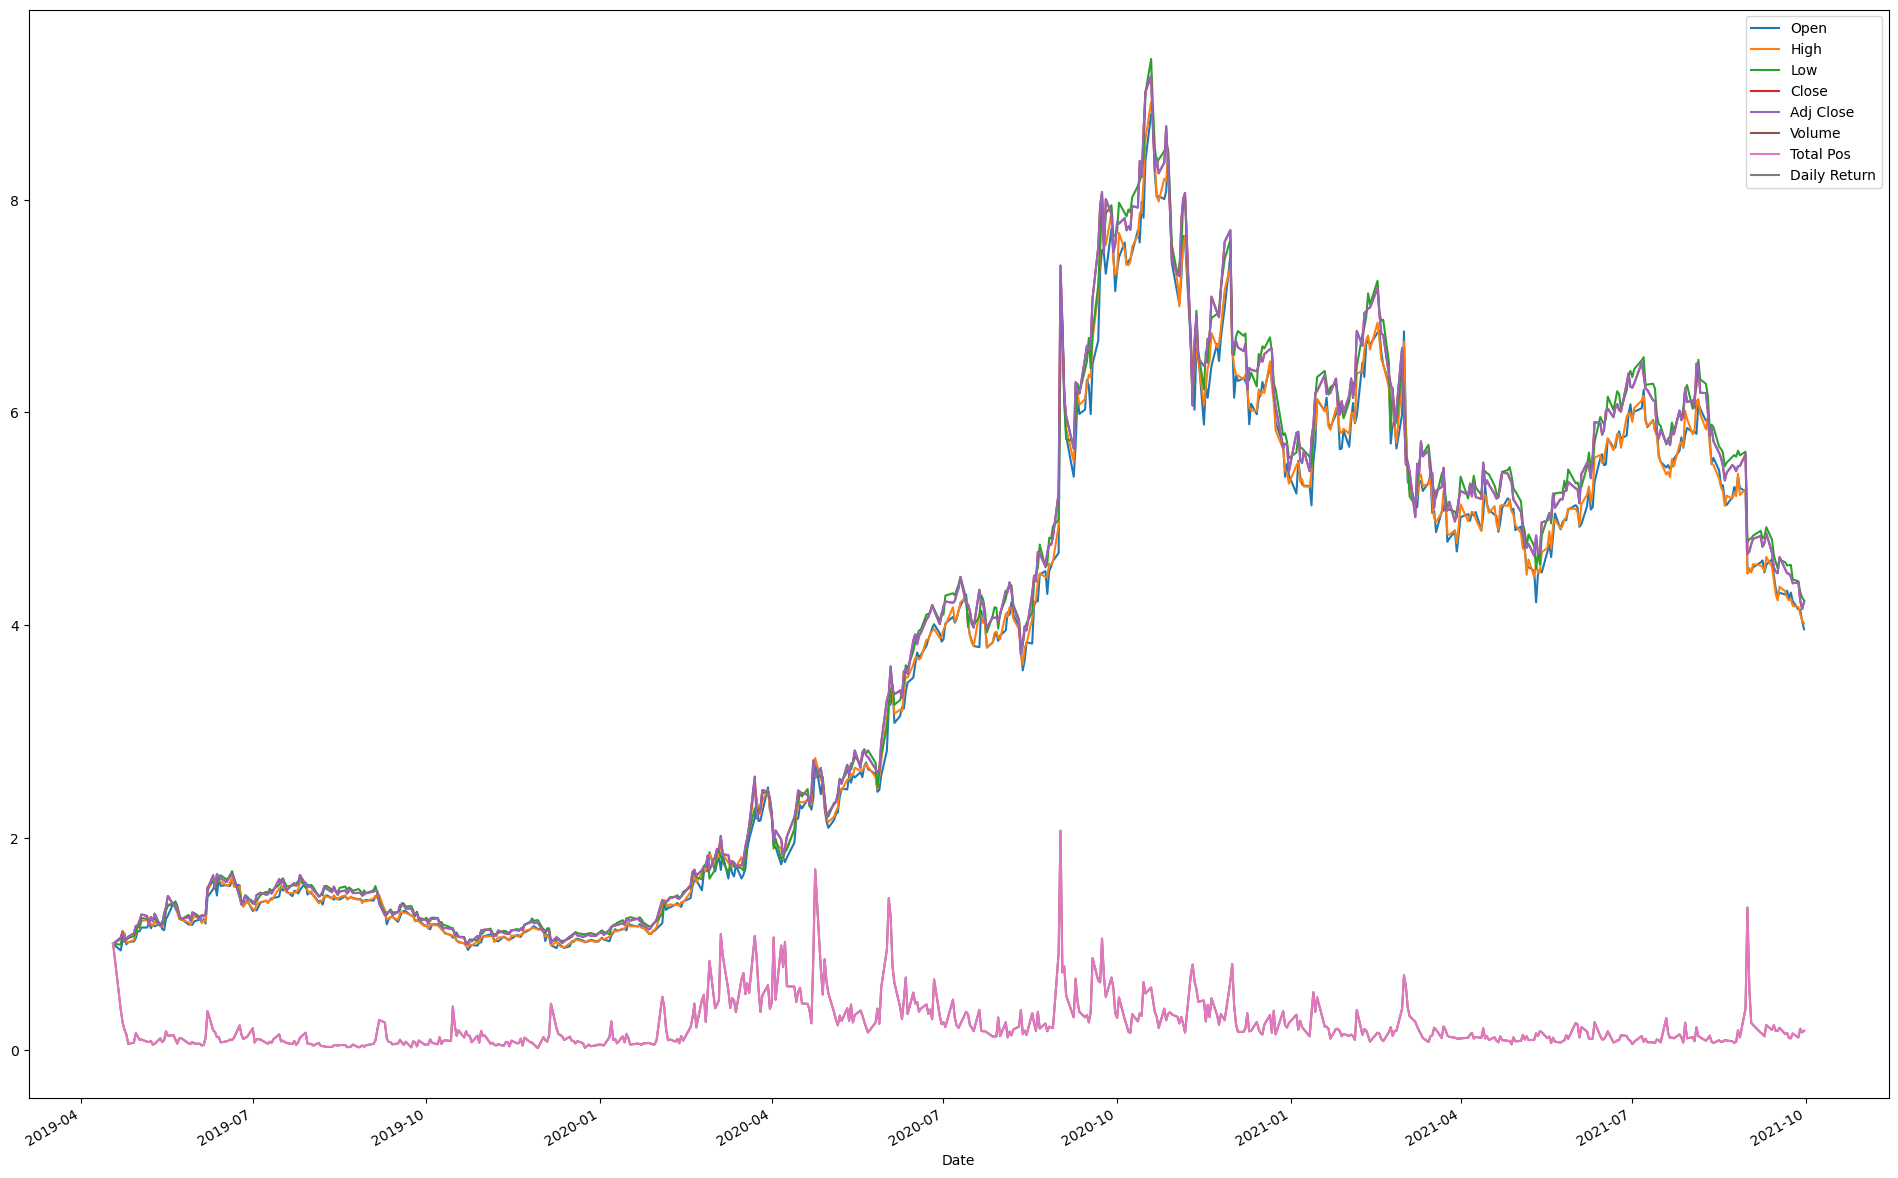

In [25]:
# Normalizzazione dei dati rispetto al valore iniziale
all_plot = df/df.iloc[0]
all_plot.plot(figsize=(24,16))

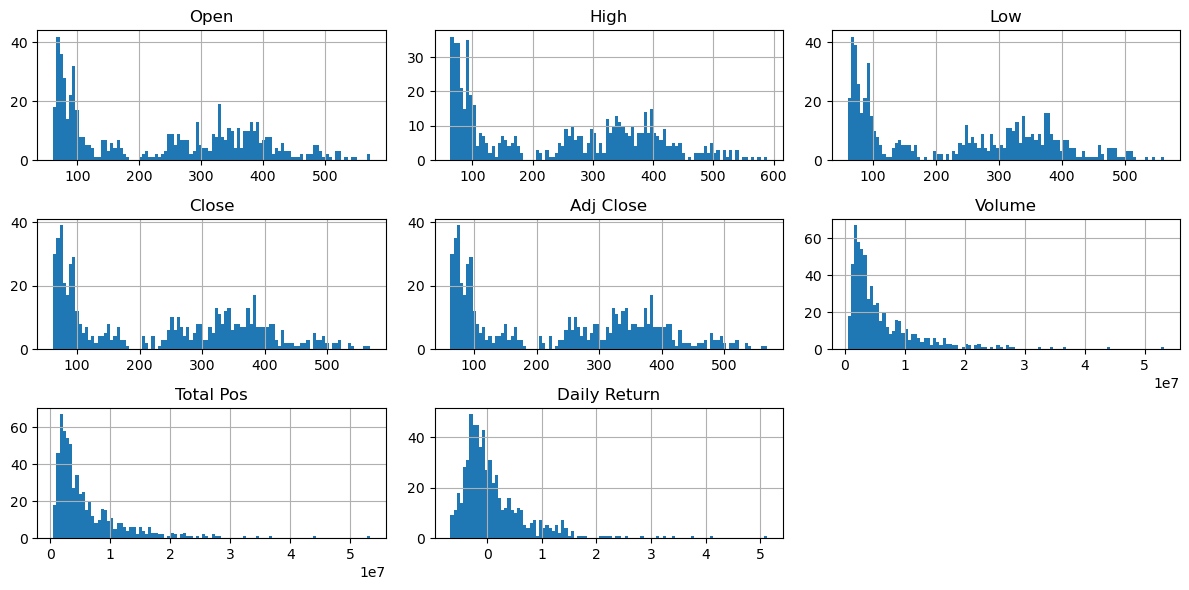

In [26]:
# Plot dell'istogramma dei dati
df.hist(bins=100,figsize=(12,6));
plt.tight_layout()

In [27]:
# Calcolo e visualizzazione delle statistiche annuali
df.resample(rule='A').mean()

,Open,High,Low,Close,Adj Close,Volume,Total Pos,Daily Return
Date,,,,,,,,
2019-12-31,80.395000,82.292415,78.305528,80.239382,80.239382,2.652070e+06,2.652472e+06,0.130557
2020-12-31,262.402293,269.963482,254.677829,262.663024,262.663024,1.009431e+07,1.009562e+07,0.139067
2021-12-31,346.170250,353.027233,338.623665,345.806276,345.806276,4.268201e+06,4.269930e+06,0.110538


In [28]:
# Calcolo e visualizzazione delle statistiche annuali con finestra temporale
df.resample(rule='AS').min()

,Open,High,Low,Close,Adj Close,Volume,Total Pos,Daily Return
Date,,,,,,,,
2019-01-01,61.000000,63.740002,59.939999,62.000000,62.000000,512600,5.129719e+05,-0.669638
2020-01-01,66.629997,68.680000,65.811996,67.279999,67.279999,1127900,1.128238e+06,-0.645510
2021-01-01,257.386993,264.878998,255.250000,257.410004,257.410004,1437600,1.439253e+06,-0.617506


In [29]:
# Calcolo della media mensile dei prezzi di chiusura
df.resample(rule='AS').std()

,Open,High,Low,Close,Adj Close,Volume,Total Pos,Daily Return
Date,,,,,,,,
2019-01-01,12.083912,12.345272,11.551943,11.799247,11.799247,2.462221e+06,2.462210e+06,0.724966
2020-01-01,145.355461,148.611755,140.953351,144.363178,144.363178,7.136259e+06,7.136303e+06,0.657003
2021-01-01,39.422279,40.339179,37.639423,38.994671,38.994671,3.384832e+06,3.384825e+06,0.606335


In [30]:
# Calcolo del massimo mensile dei prezzi di chiusura
df.resample(rule='M').mean().head()

,Open,High,Low,Close,Adj Close,Volume,Total Pos,Daily Return
Date,,,,,,,,
2019-04-30,66.257501,69.428624,63.323874,66.470000,66.470000,7.350062e+06,7.350394e+06,-0.082393
2019-05-31,78.190909,81.378863,75.868181,78.708636,78.708636,2.421468e+06,2.421861e+06,0.020835
2019-06-30,93.852500,96.277299,90.157800,92.489000,92.489000,3.254190e+06,3.254655e+06,0.155300
2019-07-31,94.151818,96.395908,91.936727,94.336818,94.336818,2.345995e+06,2.346467e+06,0.053959
2019-08-31,92.705454,94.238455,90.891863,92.455455,92.455455,1.064409e+06,1.064872e+06,0.035267


In [31]:
# Calcolo del massimo mensile dei prezzi di chiusura
df.resample(rule='MS').max().head()

,Open,High,Low,Close,Adj Close,Volume,Total Pos,Daily Return
Date,,,,,,,,
2019-04-01,71.400002,74.168999,66.669998,72.470001,72.470001,25764700,2.576502e+07,1.256870
2019-05-01,90.099998,91.459999,84.500000,89.980003,89.980003,4580700,4.581114e+06,0.887652
2019-06-01,105.099998,107.339996,101.621002,102.769997,102.769997,9487800,9.488273e+06,2.137249
2019-07-01,102.599998,104.489998,97.830002,102.199997,102.199997,5306600,5.307030e+06,0.643680
2019-08-01,95.750000,98.660004,93.800003,95.769997,95.769997,1774400,1.774849e+06,0.588131


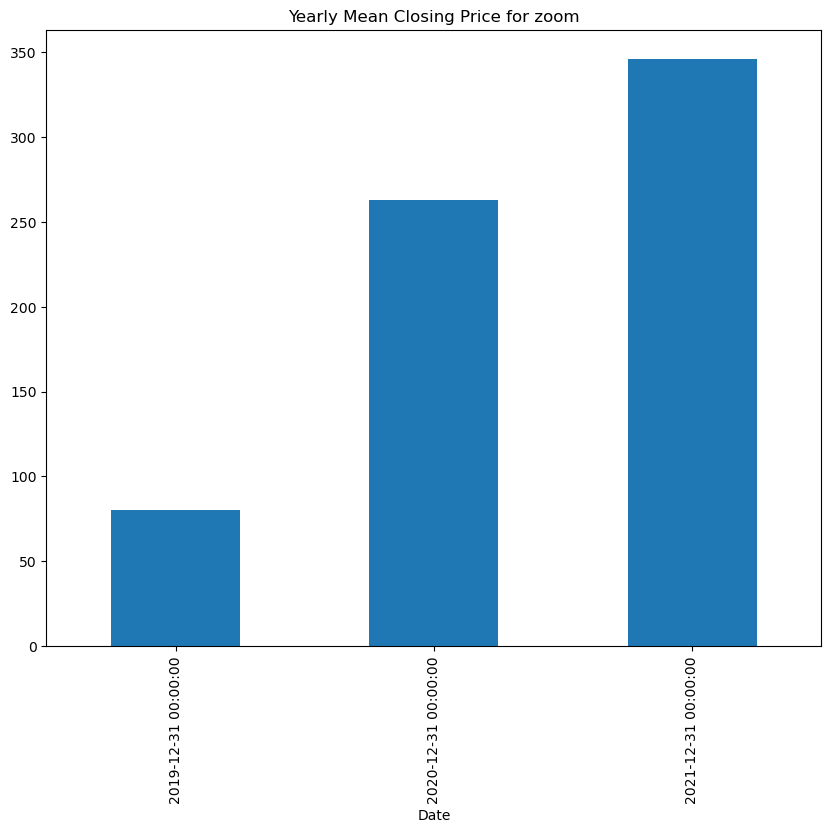

In [32]:
# Plot della media annuale dei prezzi di chiusura
title = 'Yearly Mean Closing Price for zoom'
df['Close'].resample('A').mean().plot.bar(title=title,figsize=(10,8));

In [33]:
# Calcolo del massimo mensile dei prezzi di chiusura e plot
df.resample(rule='M').max().head()

,Open,High,Low,Close,Adj Close,Volume,Total Pos,Daily Return
Date,,,,,,,,
2019-04-30,71.400002,74.168999,66.669998,72.470001,72.470001,25764700,2.576502e+07,1.256870
2019-05-31,90.099998,91.459999,84.500000,89.980003,89.980003,4580700,4.581114e+06,0.887652
2019-06-30,105.099998,107.339996,101.621002,102.769997,102.769997,9487800,9.488273e+06,2.137249
2019-07-31,102.599998,104.489998,97.830002,102.199997,102.199997,5306600,5.307030e+06,0.643680
2019-08-31,95.750000,98.660004,93.800003,95.769997,95.769997,1774400,1.774849e+06,0.588131


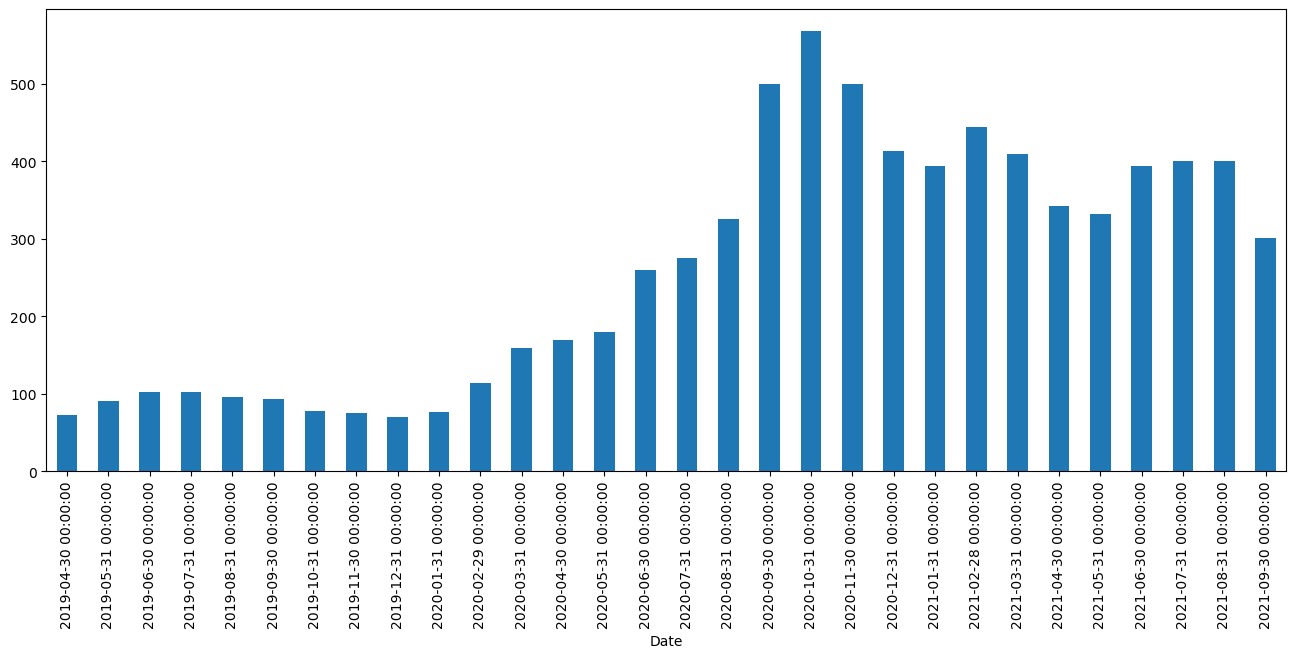

In [34]:
# Calcolo del massimo mensile dei prezzi di chiusura e plot
df['Close'].resample('M').max().plot.bar(figsize=(16,6),color='#1f77b4');

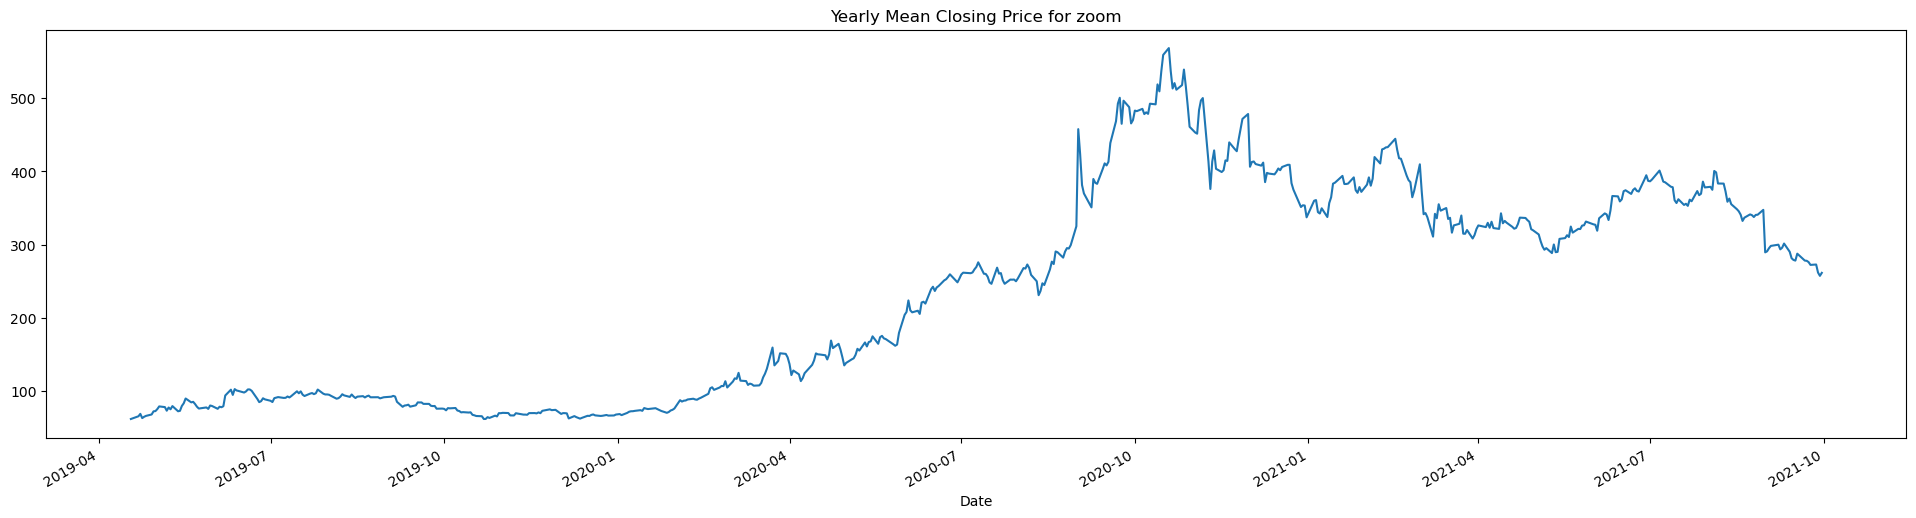

In [35]:
# Plot dell'andamento temporale del prezzo di chiusura
ax = df['Close'].plot(figsize=(24,6),title=title)

In [36]:
# Calcolo delle medie mobili semplici (SMA)
df['6-month-SMA'] = df['Close'].rolling(window=6).mean()
df['12-month-SMA'] = df['Close'].rolling(window=12).mean()
df['2-month-SMA'] = df['Close'].rolling(window=2).mean()

In [37]:
# Visualizzazione delle prime righe dopo l'aggiunta delle colonne SMA
df.head(10)

,Open,High,Low,Close,Adj Close,Volume,Total Pos,Daily Return,6-month-SMA,12-month-SMA,2-month-SMA
Date,,,,,,,,,,,
2019-04-18,65.000000,66.000000,60.320999,62.000000,62.000000,25764700,2.576502e+07,NaN,NaN,NaN,NaN
2019-04-22,61.000000,68.900002,59.939999,65.699997,65.699997,9949700,9.950021e+06,-0.613817,NaN,NaN,63.849998
2019-04-23,66.870003,74.168999,65.550003,69.000000,69.000000,6786500,6.786845e+06,-0.317907,NaN,NaN,67.349998
2019-04-24,71.400002,71.500000,63.160000,63.200001,63.200001,4973500,4.973832e+06,-0.267136,NaN,NaN,66.100000
2019-04-25,64.739998,66.849998,62.599998,65.000000,65.000000,3863300,3.863624e+06,-0.223210,NaN,NaN,64.100000
2019-04-26,66.120003,66.989998,63.599998,66.220001,66.220001,1527400,1.527729e+06,-0.604587,65.186667,NaN,65.610000
2019-04-29,66.529999,68.500000,64.750000,68.169998,68.169998,1822300,1.822636e+06,0.193036,66.214999,NaN,67.194999
2019-04-30,68.400002,72.519997,66.669998,72.470001,72.470001,4113100,4.113453e+06,1.256870,67.343333,NaN,70.319999
2019-05-01,72.720001,76.949997,70.816002,72.760002,72.760002,3301900,3.302266e+06,-0.197203,67.970000,NaN,72.615002


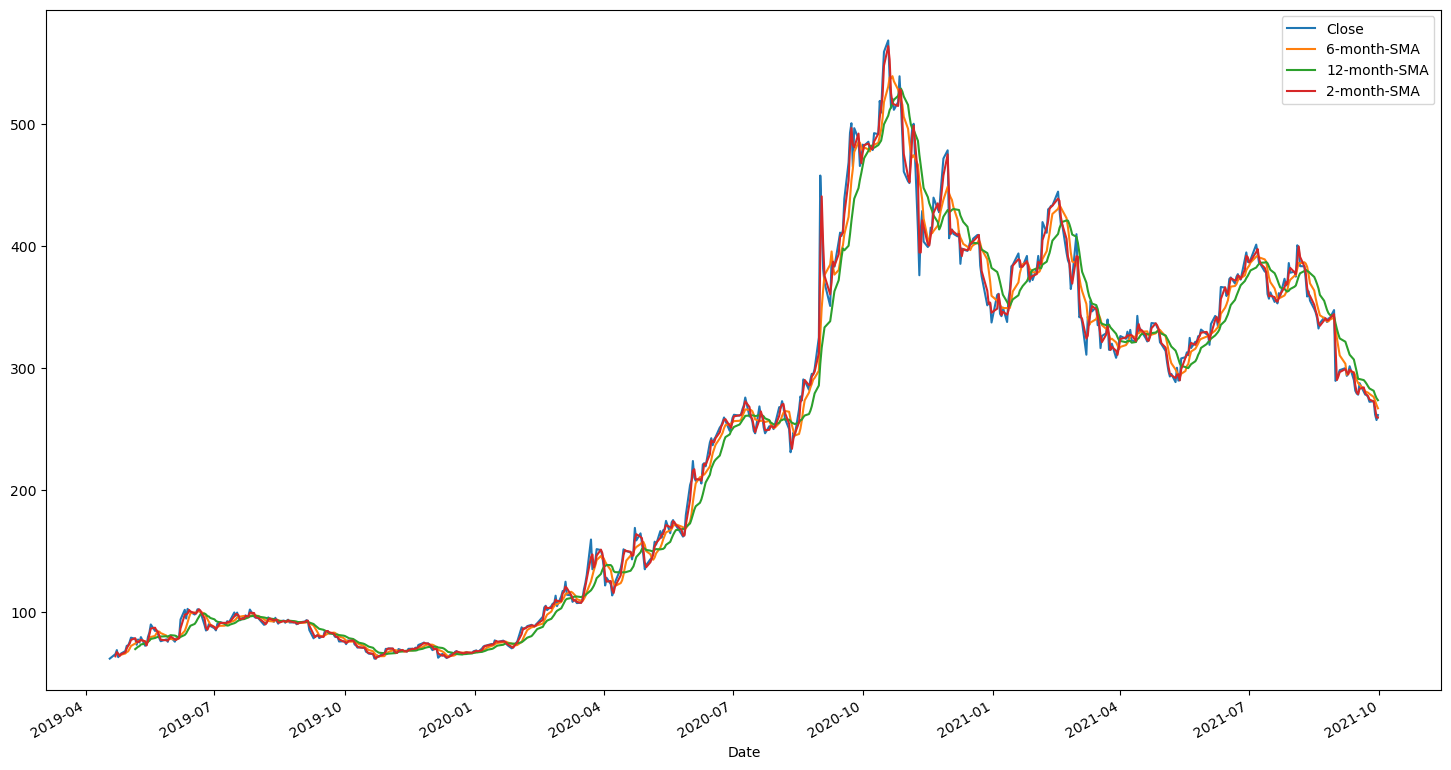

In [38]:
# Plot delle medie mobili insieme ai dati originali
df[["Close","6-month-SMA","12-month-SMA","2-month-SMA"]].plot(figsize=(18,10));

In [39]:
# Calcolo della media mobile esponenziale pesata (EWMA)
df['EWMA12'] = df['Close'].ewm(span=12,adjust=True).mean()

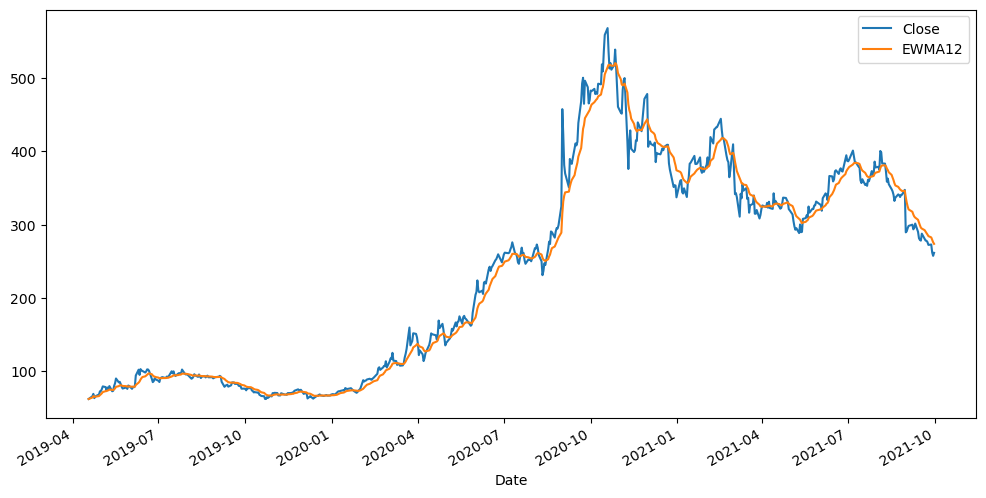

In [40]:
# Plot della colonna 'Close' insieme alle colonne EWMA12 e 12-month-SMA
df[['Close','EWMA12']].plot(figsize=(12,6));

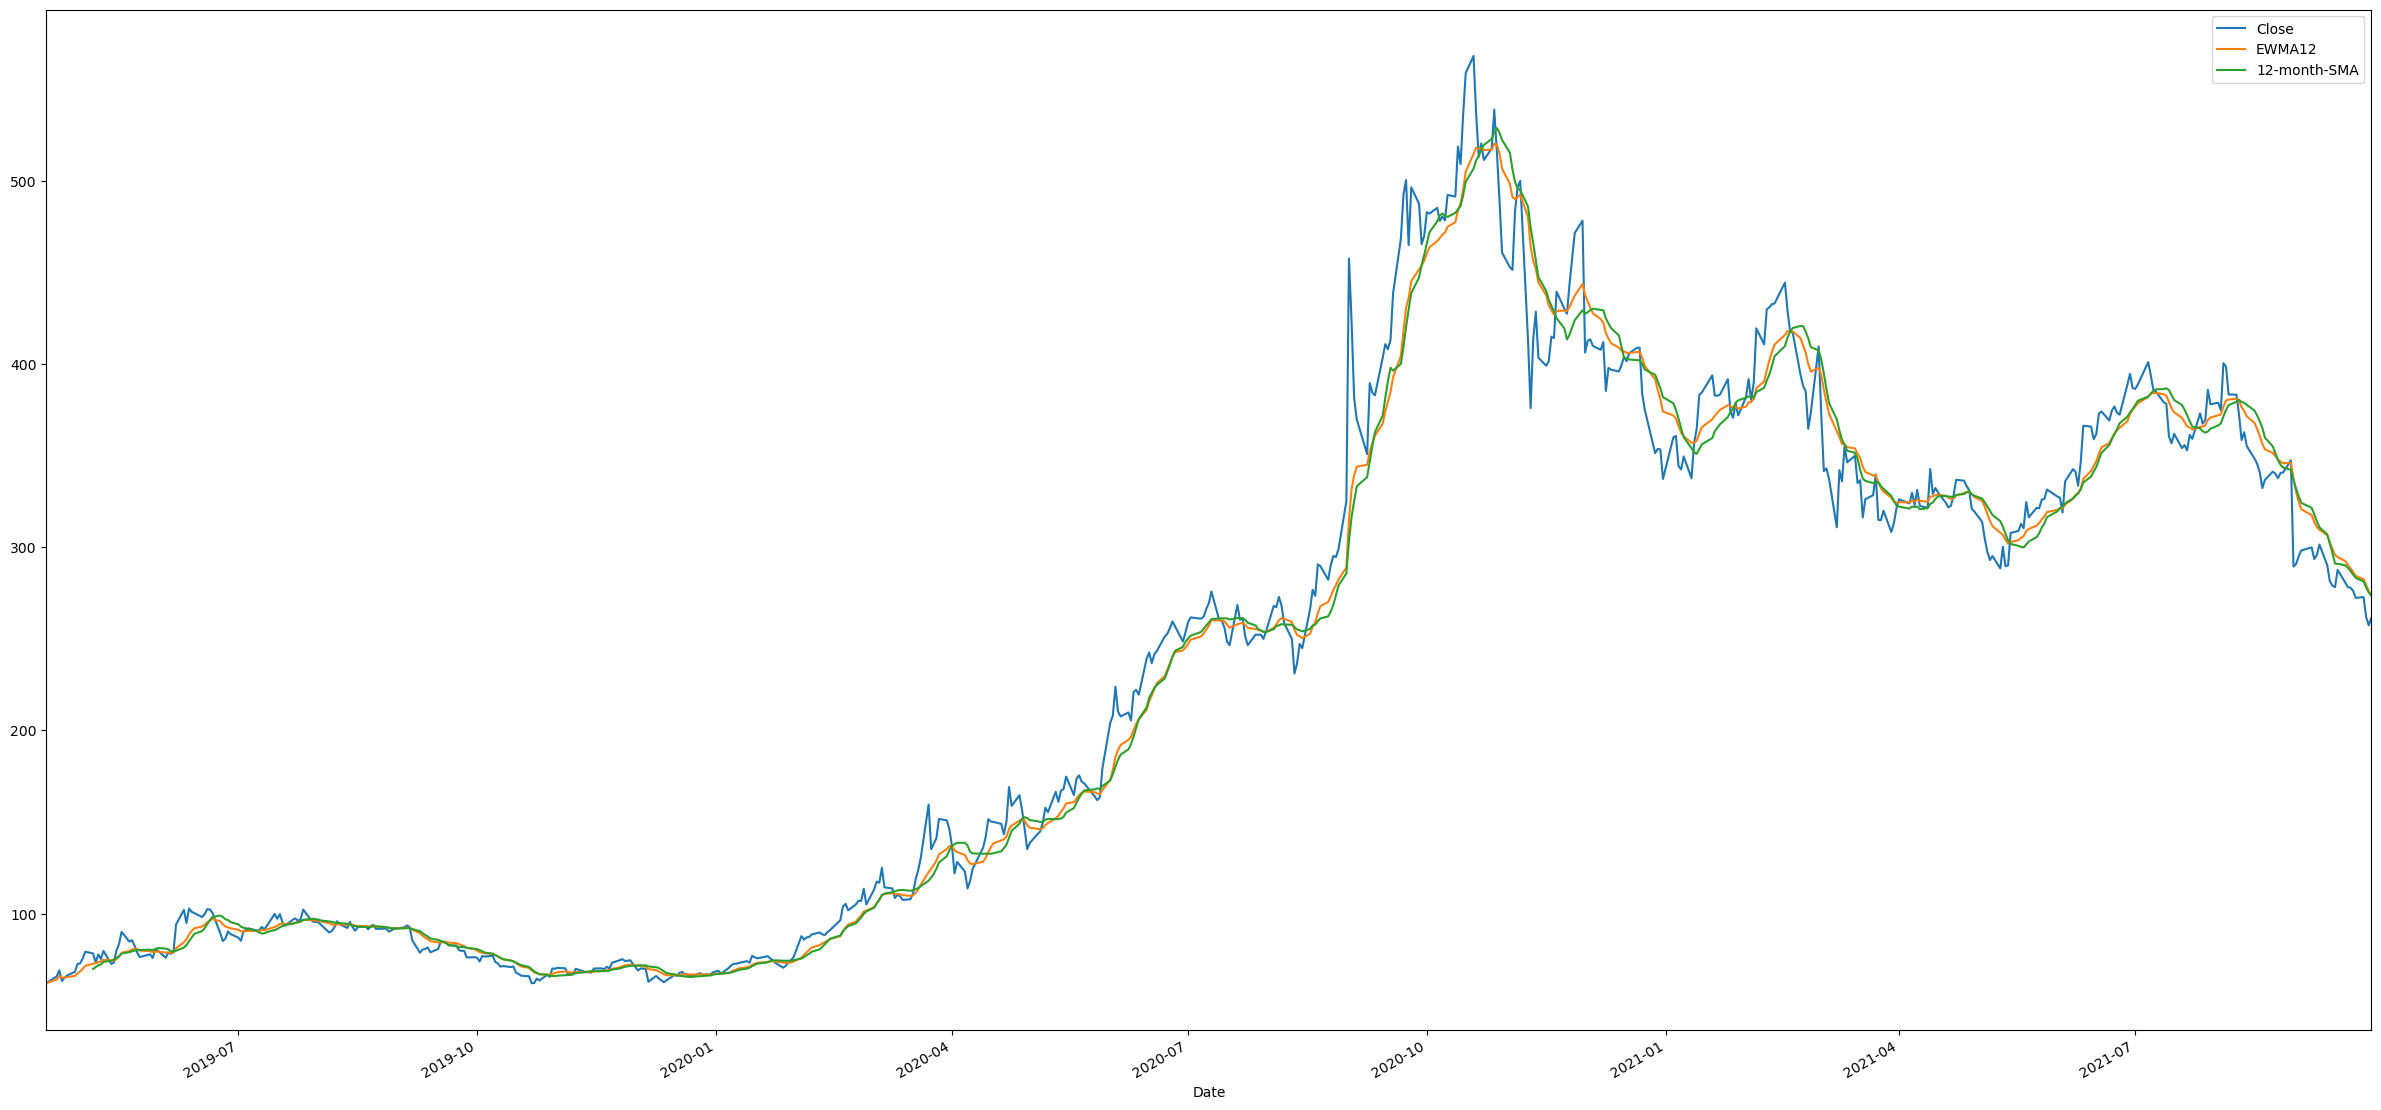

In [41]:
# Plot delle colonne 'Close', 'EWMA12', e '12-month-SMA' con autoscaling sull'asse x
df[['Close','EWMA12','12-month-SMA']].plot(figsize=(30,15)).autoscale(axis='x',tight=True);

In [42]:
# Import del modello SimpleExpSmoothing da statsmodels.tsa.holtwinters
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [43]:
# Calcolo dell'EWMA con il metodo SimpleExponentialSmoothing
span = 12
alpha = 2/(span+1)

In [44]:
df['EWMA12'] = df['Close'].ewm(alpha=alpha,adjust=False).mean()

In [45]:
# Creazione di un modello SimpleExponentialSmoothing
model=SimpleExpSmoothing(df["Close"])

C:\Users\Giacomo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [46]:
# Addestramento del modello con smoothing level specificato
model.fit(smoothing_level=alpha,optimized=False)

In [47]:
# Addestramento del modello e ottenimento dei valori fittati
fitted_model=model.fit(smoothing_level=alpha,optimized=False)

In [48]:
fitted_model.fittedvalues

Date
2019-04-18     62.000000
2019-04-22     62.000000
2019-04-23     62.569230
2019-04-24     63.558579
2019-04-25     63.503414
                 ...    
2021-09-24    286.524797
2021-09-27    284.345595
2021-09-28    282.581658
2021-09-29    279.398329
2021-09-30    276.015509
Length: 619, dtype: float64

In [49]:
# Shift dei valori fittati per allineare con i valori originali
fitted_model.fittedvalues.shift(-1)

Date
2019-04-18     62.000000
2019-04-22     62.569230
2019-04-23     63.558579
2019-04-24     63.503414
2019-04-25     63.733658
                 ...    
2021-09-24    284.345595
2021-09-27    282.581658
2021-09-28    279.398329
2021-09-29    276.015509
2021-09-30           NaN
Length: 619, dtype: float64

In [50]:
# Creazione di una nuova colonna 'SES12' con i valori fittati shiftati
df["SES12"]=fitted_model.fittedvalues.shift(-1)

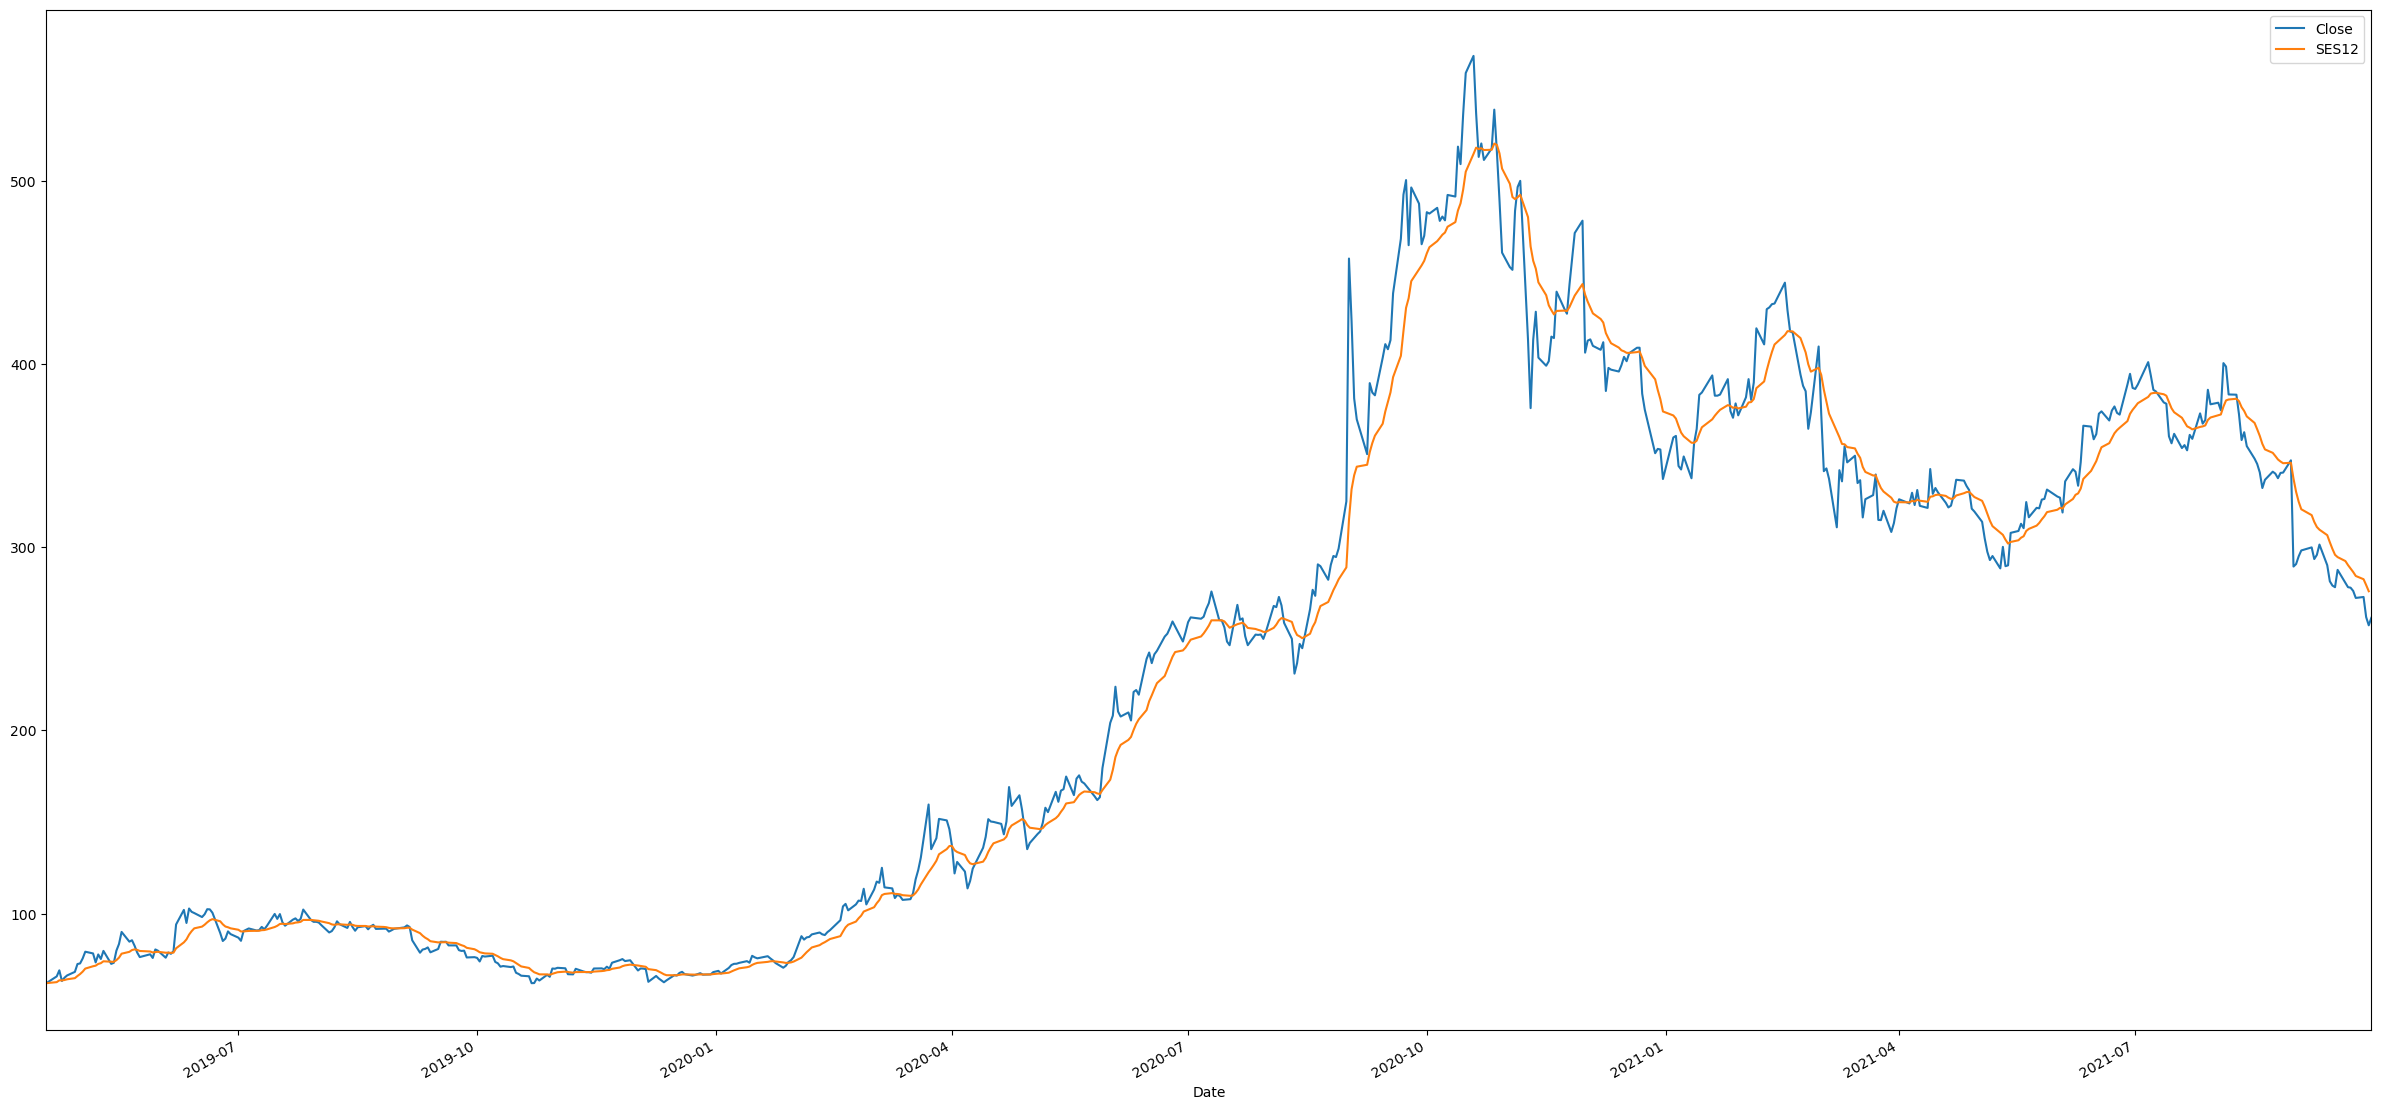

In [51]:
# Plot delle colonne 'Close' e 'SES12' con autoscaling sull'asse x
df[['Close',"SES12"]].plot(figsize=(30,15)).autoscale(axis='x',tight=True);

In [52]:
# Import del modello ExponentialSmoothing da statsmodels.tsa.holtwinters
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Creazione di una colonna 'DESadd12' con valori fittati shiftati
df['DESadd12'] = ExponentialSmoothing(df['Close'], trend='add').fit().fittedvalues.shift(-1)
df.head()

C:\Users\Giacomo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


,Open,High,Low,Close,Adj Close,Volume,Total Pos,Daily Return,6-month-SMA,12-month-SMA,2-month-SMA,EWMA12,SES12,DESadd12
Date,,,,,,,,,,,,,,
2019-04-18,65.000000,66.000000,60.320999,62.000000,62.000000,25764700,2.576502e+07,NaN,NaN,NaN,NaN,62.000000,62.000000,62.349893
2019-04-22,61.000000,68.900002,59.939999,65.699997,65.699997,9949700,9.950021e+06,-0.613817,NaN,NaN,63.849998,62.569230,62.569230,66.035749
2019-04-23,66.870003,74.168999,65.550003,69.000000,69.000000,6786500,6.786845e+06,-0.317907,NaN,NaN,67.349998,63.558579,63.558579,69.337978
2019-04-24,71.400002,71.500000,63.160000,63.200001,63.200001,4973500,4.973832e+06,-0.267136,NaN,NaN,66.100000,63.503414,63.503414,63.582933
2019-04-25,64.739998,66.849998,62.599998,65.000000,65.000000,3863300,3.863624e+06,-0.223210,NaN,NaN,64.100000,63.733658,63.733658,65.345254


<Axes: xlabel='Date'>

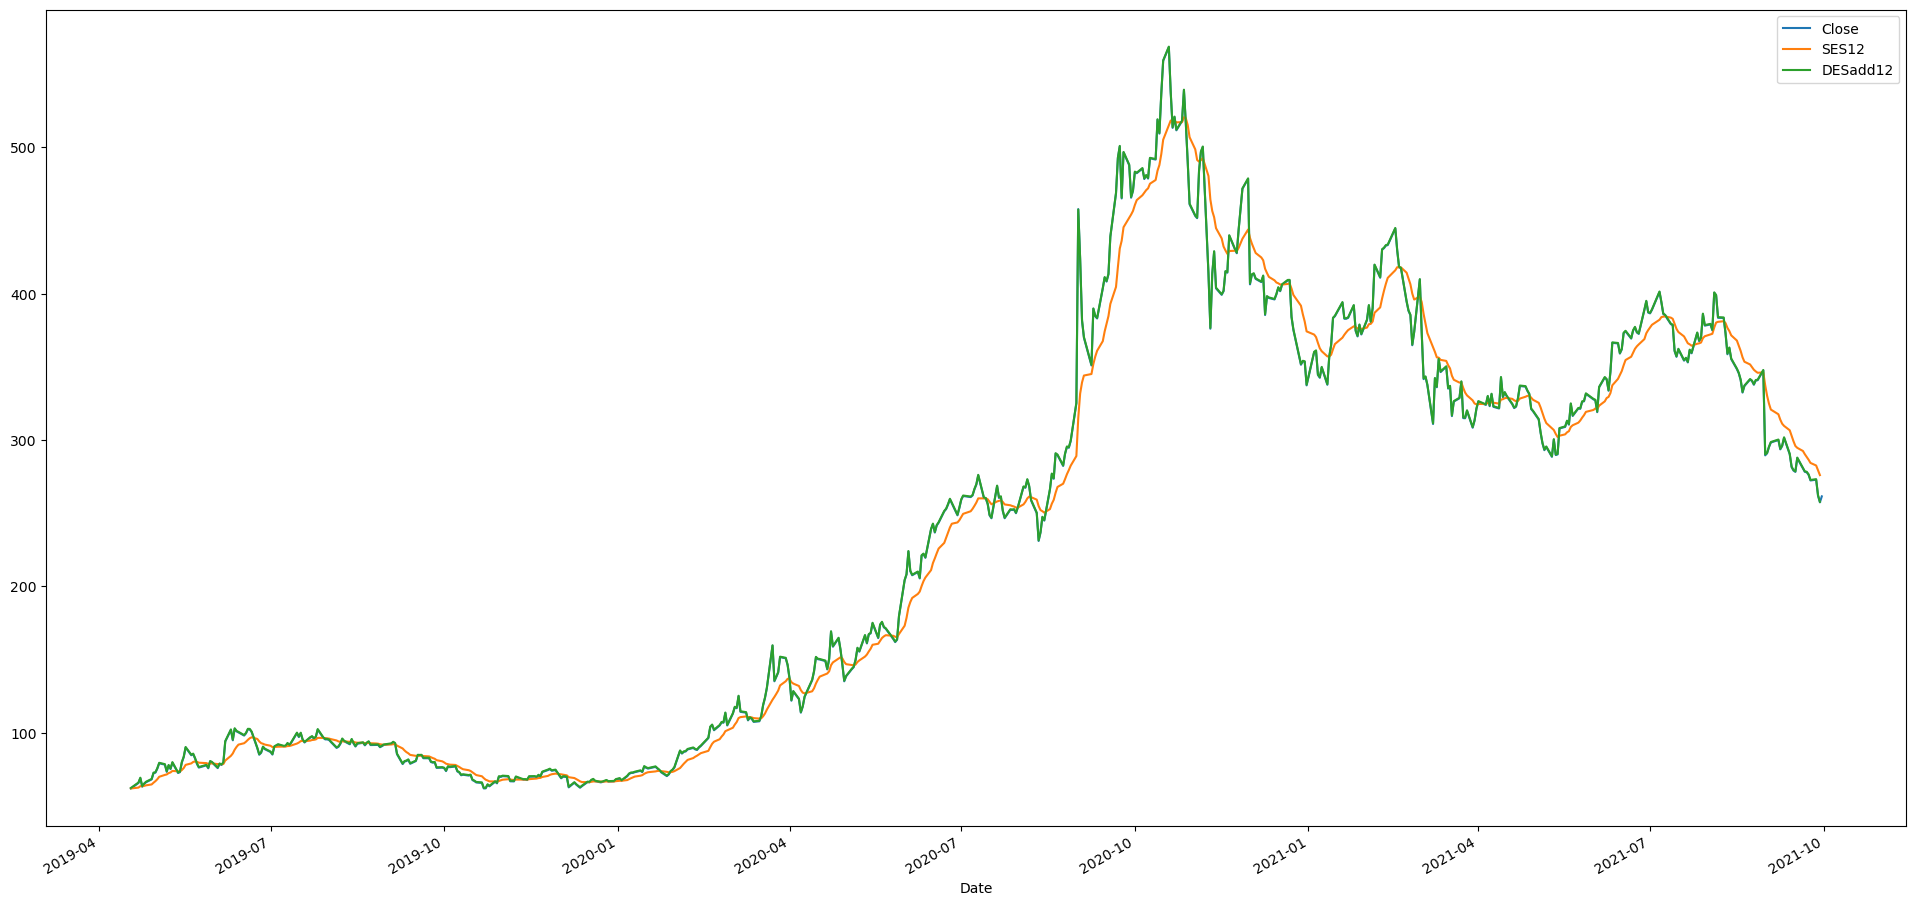

In [53]:
# Plot delle colonne 'Close', 'SES12', e 'DESadd12'
df[['Close',  'SES12', 'DESadd12']].plot(figsize=(24,12))

In [54]:
df['DESadd12'].head()

Date
2019-04-18    62.349893
2019-04-22    66.035749
2019-04-23    69.337978
2019-04-24    63.582933
2019-04-25    65.345254
Name: DESadd12, dtype: float64

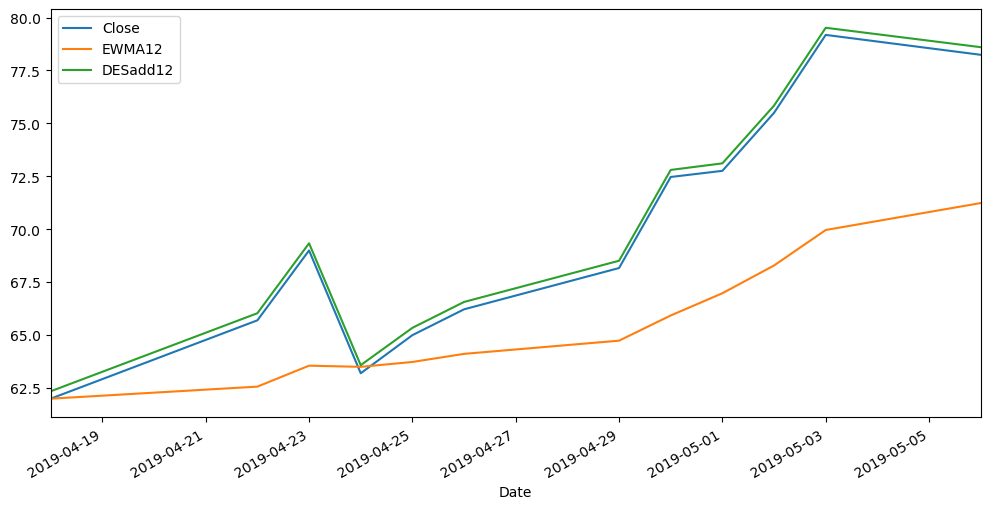

In [55]:
# Plot delle colonne 'Close', 'SES12', e 'DESadd12'
df[['Close','EWMA12','DESadd12']].iloc[:12].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

In [56]:
# Visualizzazione dei primi valori della colonna 'DESmul12'
df['DESmul12'] = ExponentialSmoothing(df['Close'], trend='mul').fit().fittedvalues.shift(-1)
df.head()

C:\Users\Giacomo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


,Open,High,Low,Close,Adj Close,Volume,Total Pos,Daily Return,6-month-SMA,12-month-SMA,2-month-SMA,EWMA12,SES12,DESadd12,DESmul12
Date,,,,,,,,,,,,,,,
2019-04-18,65.000000,66.000000,60.320999,62.000000,62.000000,25764700,2.576502e+07,NaN,NaN,NaN,NaN,62.000000,62.000000,62.349893,61.980618
2019-04-22,61.000000,68.900002,59.939999,65.699997,65.699997,9949700,9.950021e+06,-0.613817,NaN,NaN,63.849998,62.569230,62.569230,66.035749,65.685606
2019-04-23,66.870003,74.168999,65.550003,69.000000,69.000000,6786500,6.786845e+06,-0.317907,NaN,NaN,67.349998,63.558579,63.558579,69.337978,69.078045
2019-04-24,71.400002,71.500000,63.160000,63.200001,63.200001,4973500,4.973832e+06,-0.267136,NaN,NaN,66.100000,63.503414,63.503414,63.582933,63.402240
2019-04-25,64.739998,66.849998,62.599998,65.000000,65.000000,3863300,3.863624e+06,-0.223210,NaN,NaN,64.100000,63.733658,63.733658,65.345254,65.030351


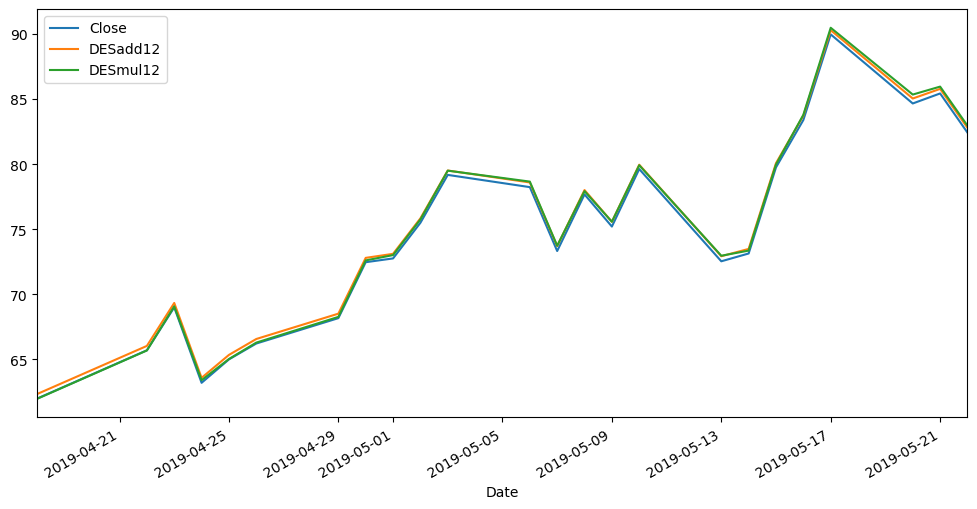

In [57]:
# Plot delle colonne 'Close', 'DESadd12', e 'DESmul12' per i primi 24 mesi
df[['Close','DESadd12','DESmul12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

In [58]:
# Creazione di una colonna 'TESadd12' con valori fittati
df['TESadd12'] = ExponentialSmoothing(df['Close'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues
df.head()

C:\Users\Giacomo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


,Open,High,Low,Close,Adj Close,Volume,Total Pos,Daily Return,6-month-SMA,12-month-SMA,2-month-SMA,EWMA12,SES12,DESadd12,DESmul12,TESadd12
Date,,,,,,,,,,,,,,,,
2019-04-18,65.000000,66.000000,60.320999,62.000000,62.000000,25764700,2.576502e+07,NaN,NaN,NaN,NaN,62.000000,62.000000,62.349893,61.980618,70.809042
2019-04-22,61.000000,68.900002,59.939999,65.699997,65.699997,9949700,9.950021e+06,-0.613817,NaN,NaN,63.849998,62.569230,62.569230,66.035749,65.685606,60.400905
2019-04-23,66.870003,74.168999,65.550003,69.000000,69.000000,6786500,6.786845e+06,-0.317907,NaN,NaN,67.349998,63.558579,63.558579,69.337978,69.078045,62.510388
2019-04-24,71.400002,71.500000,63.160000,63.200001,63.200001,4973500,4.973832e+06,-0.267136,NaN,NaN,66.100000,63.503414,63.503414,63.582933,63.402240,71.785380
2019-04-25,64.739998,66.849998,62.599998,65.000000,65.000000,3863300,3.863624e+06,-0.223210,NaN,NaN,64.100000,63.733658,63.733658,65.345254,65.030351,60.877927


In [59]:
# Creazione di una colonna 'TESmul12' con valori fittati
df['TESmul12'] = ExponentialSmoothing(df['Close'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues
df.head()

C:\Users\Giacomo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Giacomo\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


,Open,High,Low,Close,Adj Close,Volume,Total Pos,Daily Return,6-month-SMA,12-month-SMA,2-month-SMA,EWMA12,SES12,DESadd12,DESmul12,TESadd12,TESmul12
Date,,,,,,,,,,,,,,,,,
2019-04-18,65.000000,66.000000,60.320999,62.000000,62.000000,25764700,2.576502e+07,NaN,NaN,NaN,NaN,62.000000,62.000000,62.349893,61.980618,70.809042,69.611680
2019-04-22,61.000000,68.900002,59.939999,65.699997,65.699997,9949700,9.950021e+06,-0.613817,NaN,NaN,63.849998,62.569230,62.569230,66.035749,65.685606,60.400905,61.921781
2019-04-23,66.870003,74.168999,65.550003,69.000000,69.000000,6786500,6.786845e+06,-0.317907,NaN,NaN,67.349998,63.558579,63.558579,69.337978,69.078045,62.510388,64.465827
2019-04-24,71.400002,71.500000,63.160000,63.200001,63.200001,4973500,4.973832e+06,-0.267136,NaN,NaN,66.100000,63.503414,63.503414,63.582933,63.402240,71.785380,69.521589
2019-04-25,64.739998,66.849998,62.599998,65.000000,65.000000,3863300,3.863624e+06,-0.223210,NaN,NaN,64.100000,63.733658,63.733658,65.345254,65.030351,60.877927,62.589261


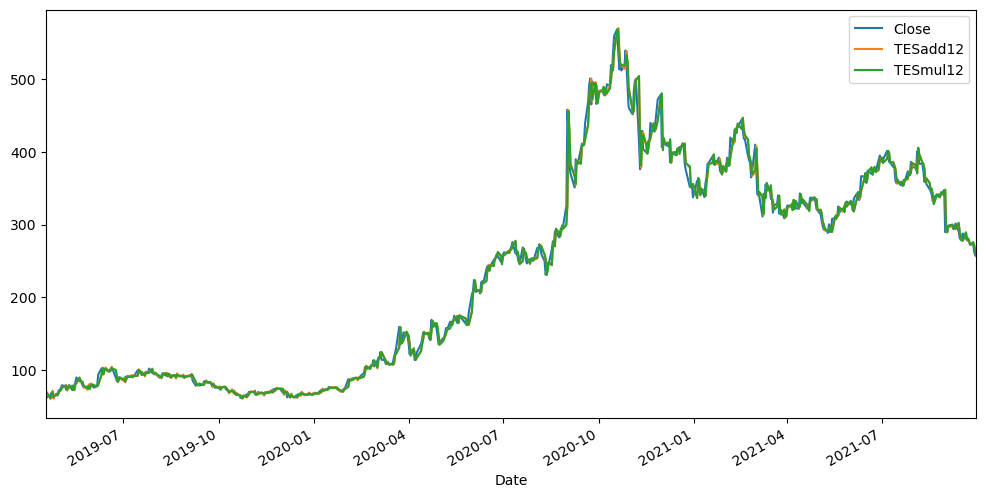

In [60]:
# Plot delle colonne 'Close', 'TESadd12', e 'TESmul12'
df[['Close','TESadd12','TESmul12']].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

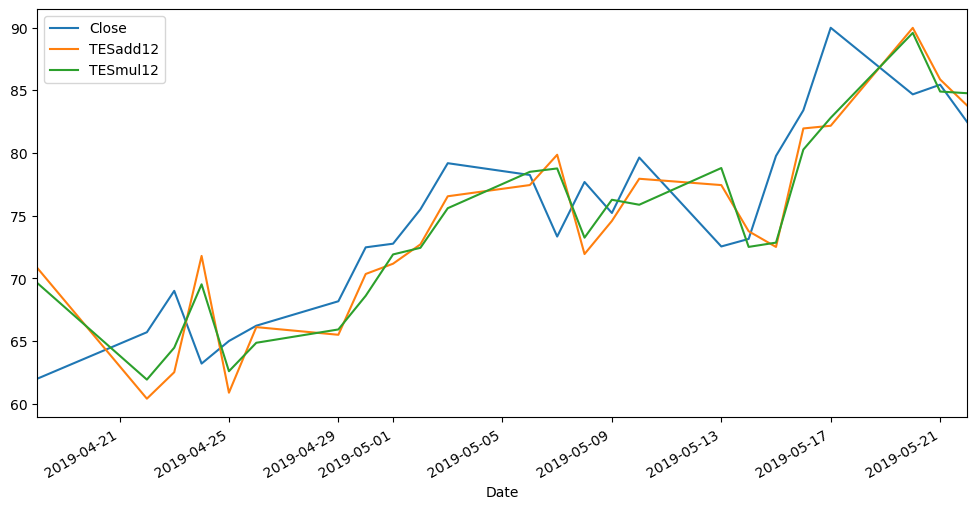

In [61]:
# Plot delle colonne 'Close', 'TESadd12', e 'TESmul12' per i primi 24 mesi
df[['Close','TESadd12','TESmul12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True);